In [51]:
import gym
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm

<PyCall.jlwrap load_agent>

In [ ]:
from julia.api import Julia
from julia import Main

jl = Julia(compiled_modules=True)
Main.include("sarsa_agent.jl")

In [52]:
env = gym.make('CliffWalking-v0')

alpha, gamma, epsilon = 0.1, 0.9, 0.1

agent = Main.SarsaAgent(env, alpha, gamma, epsilon)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [03:12<00:00, 103.65it/s]


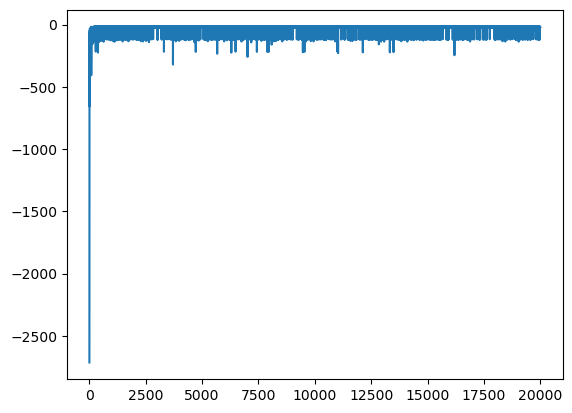

In [53]:
sarsa_Rewards = []

for episode in tqdm(range(20000)):
    episode_reward = 0
    
    state = env.reset()
    state = state[0] if isinstance(state, tuple) else state
    
    action = Main.get_action(agent, state)
    
    done = False
    while not done:

        next_state, reward, done, truncated, info = env.step(action)
        next_state = next_state[0] if isinstance(next_state, tuple) else next_state

        next_action = Main.get_action(agent, next_state)
        
        Main.update(agent, state, action, reward, next_state, next_action)
        state = next_state
        episode_reward += reward
        action = next_action
    sarsa_Rewards.append(episode_reward)

Main.save(agent)
plt.plot(sarsa_Rewards)